# Phone Deployed Snake Detector - SnakeBytes

At first we built a darknet yolo 416 model with great results, then we found out that the android tensorflow tutorial 
api only accepts SSD models.

All the paths are fully written out, despite being poor practice, as we did not believe this notebook would become
public.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


## **Cloning TFOD 2.0 Github**

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 56138, done.
remote: Counting objects: 100% (182/182), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 56138 (delta 79), reused 142 (delta 55), pack-reused 55956
Receiving objects: 100% (56138/56138), 572.16 MiB | 26.98 MiB/s, done.
Resolving deltas: 100% (38684/38684), done.


In [ ]:
pwd

'C:\\Users\\Mike\\Downloads'

In [8]:
cd C:/Users/Mike/Documents/TensorFlow/models/research

C:\Users\Mike\Documents\TensorFlow\models\research


### Installing the Object Detection API

In [9]:
cd C:/Users/Mike/Documents/TensorFlow/models/research

C:\Users\Mike\Documents\TensorFlow\models\research


In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1643821 sha256=ab872278ccc4842f0f258d8ef86696064cb7b7843379ccac32fdbd86cb5c45f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-tur02ldf/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection
  Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [10]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.9.12: C:\Users\Mike\.conda\envs\snakes_breed\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
C:\Users\Mike\.conda\envs\snakes_breed\lib\site-packages\object_detection\builders\model_builder.py:1100: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0408 07:53:22.579028  8228 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.02s
I0408 07:53:22.748028  8228 test_util.py:2373] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.02s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.8s
I0408 

All tests need to pass, skipping one test is okay

In [1]:
cd C:\Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/pre-trained-models

C:\Users\Mike\Documents\TensorFlow\workspace\SSD_mobile\pre-trained-models


Our chosen model is the ssd_mobilenet_v2_320x320_coco17_tpu-8

In [2]:
import wget
url = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar'
filename = wget.download(url)

In [4]:
!tar -xvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [2]:
cd C:\Users/Mike/Documents/TensorFlow/workspace/SSD_mobile

C:\Users\Mike\Documents\TensorFlow\workspace\SSD_mobile


In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 760B-EC6B

 Directory of C:\Users\Mike\Documents\TensorFlow\workspace\SSD_mobile

04/24/2022  11:07 AM    <DIR>          .
04/24/2022  11:07 AM    <DIR>          ..
04/24/2022  11:07 AM    <DIR>          .ipynb_checkpoints
04/24/2022  10:46 AM    <DIR>          annotations
04/24/2022  10:46 AM    <DIR>          exported-models
03/14/2022  01:42 PM             7,605 exporter_main_v2.py
04/24/2022  10:46 AM    <DIR>          images
03/14/2022  01:42 PM             4,937 model_main_tf2.py
04/24/2022  10:46 AM    <DIR>          models
04/24/2022  11:05 AM    <DIR>          pre-trained-models
04/24/2022  11:06 AM           617,055 SSD_Project.ipynb
               3 File(s)        629,597 bytes
               8 Dir(s)  85,456,109,568 bytes free


### If TF.record has already created, this next step can be skipped

In [3]:
cd C:\Users\Mike\Documents\TensorFlow\scripts\preprocessing

C:\Users\Mike\Documents\TensorFlow\scripts\preprocessing


In [4]:
# Create train data:
!python generate_tfrecord.py \
-x C:/Users/Mike/Documents/TensorFlow/workspace/SSD/images/train \ 
-l C:/Users/Mike/Documents/TensorFlow/workspace/SSD/annotations/label_map.pbtxt \
-o C:/Users/Mike/Documents/TensorFlow/workspace/SSD/annotations/train.record

Successfully created the TFRecord file: C:/Users/Mike/Documents/TensorFlow/workspace/SSD/annotations/train.record


In [ ]:
# Create test data:
!python generate_tfrecord.py -x C:/Users/Mike/Documents/TensorFlow/workspace/SSD/images/test -l C:/Users/Mike/Documents/TensorFlow/workspace/SSD/annotations/label_map.pbtxt -o C:/Users/Mike/Documents/TensorFlow/workspace/SSD/annotations/test.record

In [2]:
!pip install pandas

In [40]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 760B-EC6B

 Directory of C:\Users\Mike\Documents\TensorFlow\workspace\SSD\pre-trained-models

04/07/2022  04:45 PM    <DIR>          .
04/07/2022  04:45 PM    <DIR>          ..
07/10/2020  08:17 PM    <DIR>          ssd_resnet101_v1_fpn_640x640_coco17_tpu-8
04/07/2022  04:44 PM       386,527,459 ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz
               1 File(s)    386,527,459 bytes
               3 Dir(s)  169,620,484,096 bytes free


### Running the model

In [11]:
cd C:\Users/Mike/Documents/TensorFlow/workspace/SSD_mobile

C:\Users\Mike\Documents\TensorFlow\workspace\SSD_mobile


In [16]:
!python model_main_tf2.py \
  --pipeline_config_path=C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/pre-trained-models/ssd_mobilenet_v2_320x320_coco17_tpu-8\pipeline.config \
  --model_dir=C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/models/ssd_mobilenet_v2_320x320_coco17_tpu-8 \
  --checkpoint_every_n=250 \
  --alsologtostderr

2022-04-24 13:08:19.735086: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-24 13:08:20.119287: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5965 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0424 13:08:20.287785 17268 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0424 13:08:20.290785 17268 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorf

Inferencing My Trained Models

In [22]:
!python model_main_tf2.py \
  --pipeline_config_path=C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/pre-trained-models/ssd_mobilenet_v2_320x320_coco17_tpu-8\pipeline.config \
  --model_dir=C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/models/ssd_mobilenet_v2_320x320_coco17_tpu-8/evaluation \
  --checkpoint_dir=C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/models/ssd_mobilenet_v2_320x320_coco17_tpu-8 \
  --sample_1_of_n_eval_examples=1

creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.07s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.238
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.143
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.134
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.454
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.575
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.584
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 

W0424 15:58:46.717561 14392 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0424 15:58:46.717561 14392 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0424 15:58:46.717561 14392 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0424 15:58:46.717561 14392 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0424 15:58:46.717561 14392 model_lib_v2.py:1107] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2022-04-24 15:58:46.720523: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable

In [39]:
cd C:\Users\Mike\Documents\TensorFlow\workspace\SSD_mobile

C:\Users\Mike\Documents\TensorFlow\workspace\SSD_mobile


In [1]:
# From the tensorflow/models/research/ directory
!python export_tflite_graph_tf2.py \
    --pipeline_config_path C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/pre-trained-models/ssd_mobilenet_v2_320x320_coco17_tpu-8\pipeline.config \
    --trained_checkpoint_dir C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/models/ssd_mobilenet_v2_320x320_coco17_tpu-8 \
    --output_directory C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/exported_models

2022-04-24 19:43:04.102299: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-24 19:43:05.346722: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5965 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5
INFO:tensorflow:depth of additional conv before box predictor: 0
I0424 19:43:09.249397  2548 convolutional_keras_box_predictor.py:153] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0424 19:43:09.249397  2548 convolutional_keras_box_predictor.py:153] depth of additional conv before box predictor: 0
INFO:tensorflow:depth 

Loading model...Done!


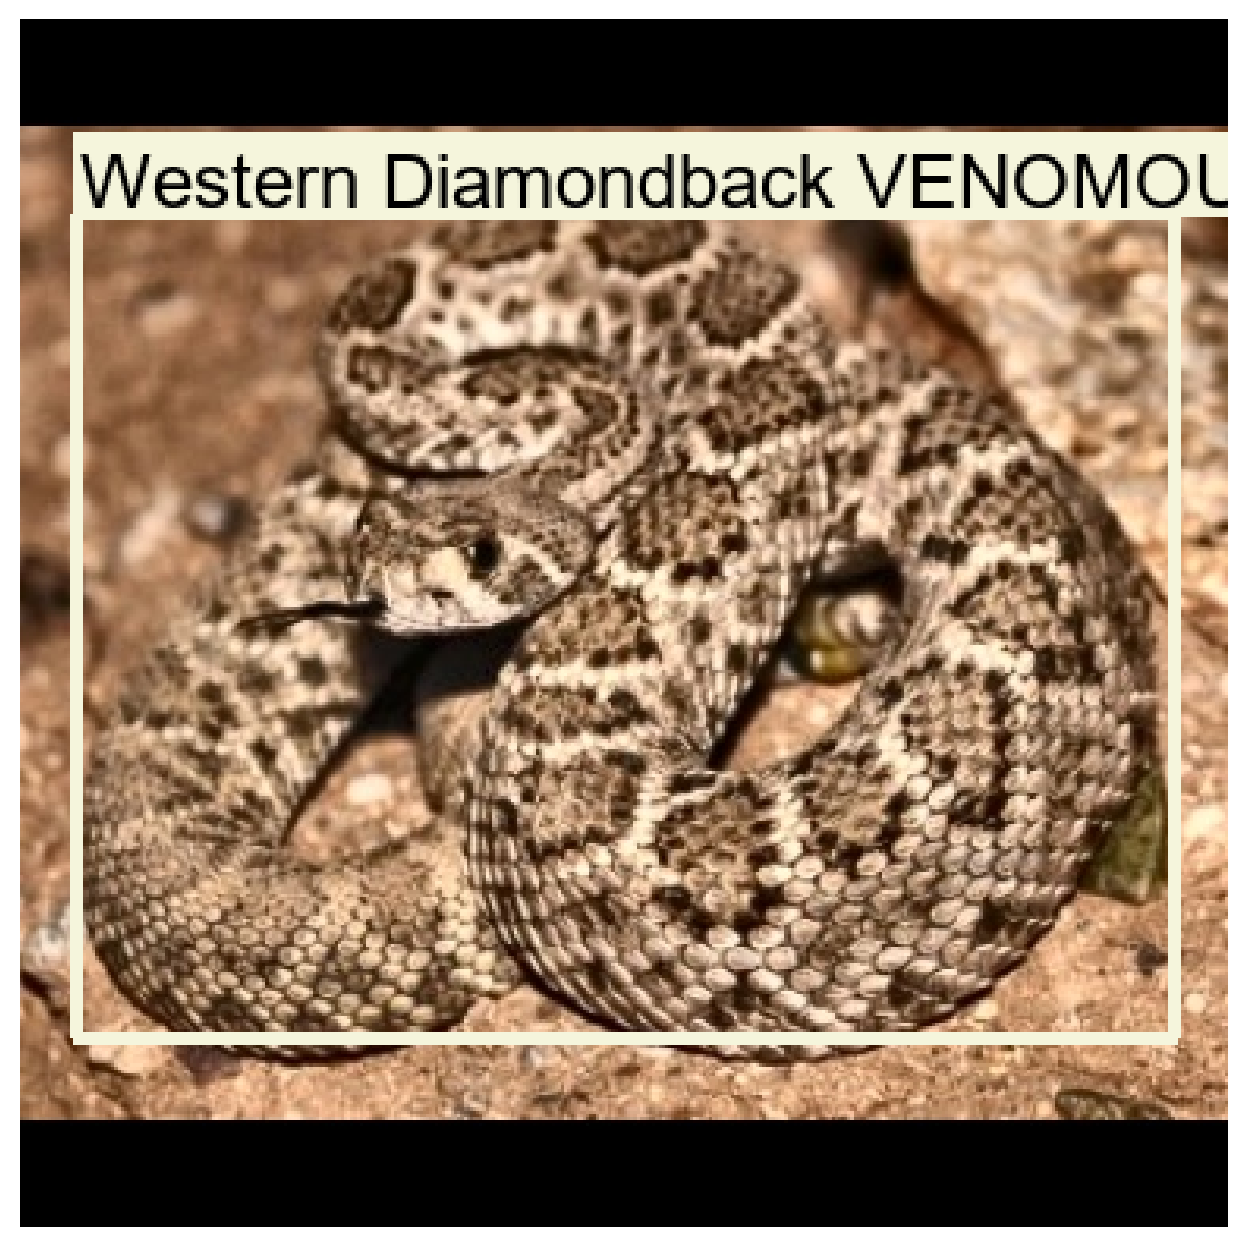

In [34]:
# The next step is to test the model on a test image

import tensorflow as tf
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
import cv2
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

IMAGE_SIZE = (12, 8) # Output display size as you want
import matplotlib.pyplot as plt
PATH_TO_SAVED_MODEL="C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/exported_models/saved_model"
print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap("C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/annotations/label_map.pbtxt",use_display_name=True)
#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

def load_image_into_numpy_array(path):

    return np.array(Image.open(path))

image_path = "C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/images/test/ff3c278063d9783e6db51facd2c3fc8b.JPG"
#print('Running inference for {}... '.format(image_path), end='')

image_np = load_image_into_numpy_array(image_path)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_np)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.50, # Adjust this value to set the minimum probability boxes to be classified as True
      agnostic_mode=False)
%matplotlib inline
plt.figure(figsize=IMAGE_SIZE, dpi=200)
plt.axis("off")
plt.imshow(image_np_with_detections)
plt.show()

In [1]:
cd C:\Users\Mike\Documents\TensorFlow\workspace\SSD_mobile

C:\Users\Mike\Documents\TensorFlow\workspace\SSD_mobile


In [ ]:
# This cell was only used to build the command to convert the model

!tflite_convert \
    --input_shape=1,300,300,3 \ 
    --input_arrays=normalized_input_image_tensor \
    --output_arrays=TFLite_Detection_PostProcess,TFLite_Detection_PostProcess:1,TFLite_Detection_PostProcess:2,TFLite_Detection_PostProcess:3 \ 
    --allow_custom_ops \
    --saved_model_dir=C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/exported_models/saved_model/saved_model.pb \
    --output_file=C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/detect.tflite

In [ ]:
# This cell as well, the command was pasted into PowerShell
tflite_convert --input_shape=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays=TFLite_Detection_PostProcess,TFLite_Detection_PostProcess:1,TFLite_Detection_PostProcess:2,TFLite_Detection_PostProcess:3 --allow_custom_ops --saved_model_dir=C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/exported_models/saved_model/saved_model.pb --output_file=C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/detect.tflite

In [11]:
cd C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/exported_models/saved_model

C:\Users\Mike\Documents\TensorFlow\workspace\SSD_mobile\exported_models\saved_model


In [1]:
# The next step is to embed metadata into the TFlite model.  Unfortunately the TFlite exporter function does not
# appear to have been updated with the change in TFlite model structure.  With the release of TFlite model maker in 
# Dec 2021 all TFlite models now require metadata to be embedded into the model.  Fortunately we found this code
# online, and it worked!

from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import writer_utils
from tflite_support import metadata
import flatbuffers
import os
from tensorflow_lite_support.metadata import metadata_schema_py_generated as _metadata_fb
from tensorflow_lite_support.metadata.python import metadata as _metadata
from tensorflow_lite_support.metadata.python.metadata_writers import metadata_info
from tensorflow_lite_support.metadata.python.metadata_writers import metadata_writer
from tensorflow_lite_support.metadata.python.metadata_writers import writer_utils
 
ObjectDetectorWriter = object_detector.MetadataWriter
 
_MODEL_PATH = "C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/detect.tflite"
_LABEL_FILE = "C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/labelmap.txt"
_SAVE_TO_PATH = "C:/Users/Mike/Documents/TensorFlow/workspace/SSD_mobile/tflite_withmeta/detect.tflite"
 
writer = ObjectDetectorWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [127.5], [127.5], [_LABEL_FILE])
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)
 
# Verify the populated metadata and associated files.
displayer = metadata.MetadataDisplayer.with_model_file(_SAVE_TO_PATH)
print("Metadata populated:")
print(displayer.get_metadata_json())
print("Associated file(s) populated:")
print(displayer.get_packed_associated_file_list())
 
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "SSD_Detector"
model_meta.description = (
    "Identify which of a known set of objects might be present and provide "
    "information about their positions within the given image or a video "
    "stream.")
 
# Creates input info.
input_meta = _metadata_fb.TensorMetadataT()
input_meta.name = "image"
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
input_meta.content.contentProperties.colorSpace = (
    _metadata_fb.ColorSpaceType.RGB)
input_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.ImageProperties)
input_normalization = _metadata_fb.ProcessUnitT()
input_normalization.optionsType = (
    _metadata_fb.ProcessUnitOptions.NormalizationOptions)
input_normalization.options = _metadata_fb.NormalizationOptionsT()
input_normalization.options.mean = [127.5]
input_normalization.options.std = [127.5]
input_meta.processUnits = [input_normalization]
input_stats = _metadata_fb.StatsT()
input_stats.max = [255]
input_stats.min = [0]
input_meta.stats = input_stats
 
# Creates outputs info.
output_location_meta = _metadata_fb.TensorMetadataT()
output_location_meta.name = "location"
output_location_meta.description = "The locations of the detected boxes."
output_location_meta.content = _metadata_fb.ContentT()
output_location_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.BoundingBoxProperties)
output_location_meta.content.contentProperties = (
    _metadata_fb.BoundingBoxPropertiesT())
output_location_meta.content.contentProperties.index = [1, 0, 3, 2]
output_location_meta.content.contentProperties.type = (
    _metadata_fb.BoundingBoxType.BOUNDARIES)
output_location_meta.content.contentProperties.coordinateType = (
    _metadata_fb.CoordinateType.RATIO)
output_location_meta.content.range = _metadata_fb.ValueRangeT()
output_location_meta.content.range.min = 2
output_location_meta.content.range.max = 2
 
output_class_meta = _metadata_fb.TensorMetadataT()
output_class_meta.name = "category"
output_class_meta.description = "The categories of the detected boxes."
output_class_meta.content = _metadata_fb.ContentT()
output_class_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_class_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())
output_class_meta.content.range = _metadata_fb.ValueRangeT()
output_class_meta.content.range.min = 2
output_class_meta.content.range.max = 2
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename("labelmap.txt")
label_file.description = "Label of objects that this model can recognize."
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_VALUE_LABELS
output_class_meta.associatedFiles = [label_file]
 
output_score_meta = _metadata_fb.TensorMetadataT()
output_score_meta.name = "score"
output_score_meta.description = "The scores of the detected boxes."
output_score_meta.content = _metadata_fb.ContentT()
output_score_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_score_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())
output_score_meta.content.range = _metadata_fb.ValueRangeT()
output_score_meta.content.range.min = 2
output_score_meta.content.range.max = 2
 
output_number_meta = _metadata_fb.TensorMetadataT()
output_number_meta.name = "number of detections"
output_number_meta.description = "The number of the detected boxes."
output_number_meta.content = _metadata_fb.ContentT()
output_number_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_number_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())
 
# Creates subgraph info.
group = _metadata_fb.TensorGroupT()
group.name = "detection result"
group.tensorNames = [
    output_location_meta.name, output_class_meta.name,
    output_score_meta.name
]
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_meta]
subgraph.outputTensorMetadata = [
    output_location_meta, output_class_meta, output_score_meta,
    output_number_meta
]
subgraph.outputTensorGroups = [group]
model_meta.subgraphMetadata = [subgraph]
 
b = flatbuffers.Builder(0)
b.Finish(
    model_meta.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
metadata_buf = b.Output()

Metadata populated:
{
  "name": "ObjectDetector",
  "description": "Identify which of a known set of objects might be present and provide information about their positions within the given image or a video stream.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be detected.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
    